In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [3]:
samples_abs_df = pd.read_csv('YM2_dataset_full.csv')

samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(ast.literal_eval)
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(ast.literal_eval)
samples_abs_df['abs_avg_2mic'] = samples_abs_df['abs_avg_2mic'].apply(ast.literal_eval)
samples_abs_df['abs_std_2mic'] = samples_abs_df['abs_std_2mic'].apply(ast.literal_eval)
samples_abs_df['freq'] = samples_abs_df['freq'].apply(ast.literal_eval)
samples_abs_df['freq_2mic'] = samples_abs_df['freq_2mic'].apply(ast.literal_eval)
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(ast.literal_eval)
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(ast.literal_eval)
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(ast.literal_eval)
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(ast.literal_eval)
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(ast.literal_eval)
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(ast.literal_eval)
samples_abs_df['real_z_2mic'] = samples_abs_df['real_z_2mic'].apply(ast.literal_eval)
samples_abs_df['imag_z_2mic'] = samples_abs_df['imag_z_2mic'].apply(ast.literal_eval)
samples_abs_df['real_rho'] = samples_abs_df['real_rho'].apply(ast.literal_eval)
samples_abs_df['imag_rho'] = samples_abs_df['imag_rho'].apply(ast.literal_eval)
samples_abs_df['real_K'] = samples_abs_df['real_K'].apply(ast.literal_eval)
samples_abs_df['imag_K'] = samples_abs_df['imag_K'].apply(ast.literal_eval)
samples_abs_df['real_c'] = samples_abs_df['real_c'].apply(ast.literal_eval)
samples_abs_df['imag_c'] = samples_abs_df['imag_c'].apply(ast.literal_eval)

samples_abs_df = samples_abs_df.set_index('sample')

samples_abs_df.index


Index(['YM2_coarse_d1', 'YM2_coarse_d2', 'YM2_coarse_d3', 'YM2_coarse_loose',
       'YM2_extrafine_d1', 'YM2_extrafine_d2', 'YM2_extrafine_d3',
       'YM2_extrafine_loose', 'YM2_fine_d1', 'YM2_fine_d2', 'YM2_fine_d3',
       'YM2_fine_loose', 'YM2_medium_d1', 'YM2_medium_d2', 'YM2_medium_d3',
       'YM2_medium_loose'],
      dtype='object', name='sample')

In [13]:
selected_sample = samples_abs_df.loc['YM2_coarse_d1']	

zreal_2mic = selected_sample['real_z_2mic']
zimag_2mic = selected_sample['imag_z_2mic']

z_2mic_57mmgap = pd.read_csv('YM2_coarse_d1_s1_57mmgap\YM2_coarse_d1_s1_57mmgapcharImp.txt', delimiter='\t', names=['freq','impedance'])
z_2mic_57mmgap['freq'] = z_2mic_57mmgap['freq'].str.split('+').apply(lambda x: x[0])
z_2mic_57mmgap['impedance'] = z_2mic_57mmgap['impedance'].str.replace('i', 'j', regex=False).apply(complex)


In [47]:
zimag_2mic


[-14.962341749458497,
 -14.559914584918666,
 -14.352901799908965,
 -14.388998104892934,
 -14.740191856306732,
 -14.711099142234133,
 -14.7107376520644,
 -14.705404755523732,
 -14.789680155205568,
 -14.257216521059599,
 -13.718078920669166,
 -13.988304066577799,
 -14.213921665593633,
 -14.2352331398845,
 -14.0898395311603,
 -13.877987010051902,
 -13.716993956385467,
 -13.9140526649239,
 -14.2281572319812,
 -14.095308683461267,
 -13.8322267039583,
 -13.9507449141637,
 -14.072440897134035,
 -13.807867376943902,
 -13.535508562191799,
 -13.3054096782636,
 -13.178780886426267,
 -13.011490545873334,
 -13.116687105674666,
 -13.411839081059334,
 -13.451786484012267,
 -13.223669346096335,
 -13.180213778763502,
 -13.0995965480336,
 -13.027379787294533,
 -13.313818141604466,
 -13.158963010726799,
 -12.840114761536464,
 -12.912743763725501,
 -12.877757390710899,
 -12.545875299630433,
 -12.284161601876434,
 -12.514191476700967,
 -12.602696791506935,
 -12.6037923610316,
 -12.562630732738368,
 -12.504

c:\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


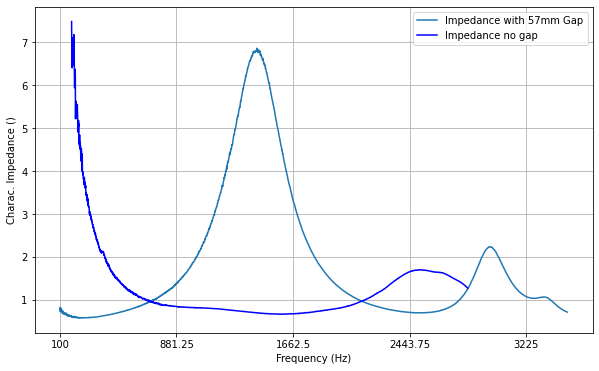

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot(z_2mic_57mmgap['freq'], np.real(z_2mic_57mmgap['impedance']), label='Real Part (57mm gap)', color='blue')
#ax.plot(z_2mic_57mmgap['freq'], np.imag(z_2mic_57mmgap['impedance']), label='Imaginary Part (57mm gap)', color='orange')

z_2mic_57mmgap.plot(ax= ax, x='freq', y='impedance', kind='line', label='Impedance with 57mm Gap', grid=True)
z_array= [complex(r, i) for r, i in zip(zreal_2mic, zimag_2mic)]
z_complex = np.array(z_array, dtype=np.complex128)
freq_array = np.array(selected_sample['freq'], dtype=np.float64)
#z_selected = np.array(selected_sample['real_z_2mic']) + np.array(selected_sample['imag_z_2mic']) * 1j
ax.plot(freq_array, z_complex.real, label='Impedance no gap', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Charac. Impedance ()')
plt.legend()
plt.show()




z_complex


In [53]:
z_complex[-1]

(1.26909453439227+0.8278430392395443j)